### $$Healthcare~~Insurance$$

In [1]:
## Import dependency libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Data Collection & Preprocessing

In [2]:
hospital_details_df = pd.read_csv('Hospitalisation details.csv')
medical_df = pd.read_csv('Medical Examinations.csv')
Patient_names = pd.read_excel('Names.xlsx')

In [3]:
hospital_details_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013


In [4]:
medical_df

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...
2330,Id2331,22.340,5.57,No,No,No,1,No
2331,Id2332,17.700,6.28,No,No,No,1,No
2332,Id2333,16.470,6.35,No,No,Yes,1,No
2333,Id2334,17.600,4.39,No,No,No,1,No


In [5]:
Patient_names

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"
...,...,...
2330,Id2331,"Brietzke, Mr. Jordan"
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr."
2332,Id2333,"Albano, Ms. Julie"
2333,Id2334,"Rosendahl, Mr. Evan P"


In [6]:
## Merging csv's into one

first_merge = pd.merge(left = hospital_details_df, right = medical_df, on = 'Customer ID')
data = pd.merge(left = Patient_names, right = first_merge, on = 'Customer ID')
df = data.copy()
df.head(2)

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.36,5.77,No,No,No,No major surgery,yes


In [159]:
## I want to change columns name for better display
df.columns = df.columns.str.lower()

In [8]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes


In [9]:
## Checking for missing values

df.isnull().sum()

customer id               0
name                      0
year                      0
month                     0
date                      0
children                  0
charges                   0
hospital tier             0
city tier                 0
state id                  0
bmi                       0
hba1c                     0
heart issues              0
any transplants           0
cancer history            0
numberofmajorsurgeries    0
smoker                    0
dtype: int64

In [10]:
## Gathering information about the data

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer id             2335 non-null   object 
 1   name                    2335 non-null   object 
 2   year                    2335 non-null   object 
 3   month                   2335 non-null   object 
 4   date                    2335 non-null   int64  
 5   children                2335 non-null   int64  
 6   charges                 2335 non-null   float64
 7   hospital tier           2335 non-null   object 
 8   city tier               2335 non-null   object 
 9   state id                2335 non-null   object 
 10  bmi                     2335 non-null   float64
 11  hba1c                   2335 non-null   float64
 12  heart issues            2335 non-null   object 
 13  any transplants         2335 non-null   object 
 14  cancer history          2335 non-null   

In [11]:
## Description analytics of the data

df.describe()

,date,children,charges,bmi,hba1c
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


In [12]:
df.describe(include='object')

,customer id,name,year,month,hospital tier,city tier,state id,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker
count,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335
unique,2335,2335,48,8,4,4,17,2,2,2,4,3
top,Id2335,"German, Mr. Aaron K",2004,Sep,tier - 2,tier - 2,R1013,No,No,No,No major surgery,No
freq,1,1,98,369,1337,808,612,1409,2191,1944,1074,1845


In [13]:
## Data has ? in this data, we are going to remove it. 

df.apply(lambda x : x == '?').sum()

customer id               0
name                      0
year                      2
month                     3
date                      0
children                  0
charges                   0
hospital tier             1
city tier                 1
state id                  2
bmi                       0
hba1c                     0
heart issues              0
any transplants           0
cancer history            0
numberofmajorsurgeries    0
smoker                    2
dtype: int64

In [14]:
df = df.replace('?', np.nan)

In [15]:
df.isnull().sum() / len(df) * 100

customer id               0.000000
name                      0.000000
year                      0.085653
month                     0.128480
date                      0.000000
children                  0.000000
charges                   0.000000
hospital tier             0.042827
city tier                 0.042827
state id                  0.085653
bmi                       0.000000
hba1c                     0.000000
heart issues              0.000000
any transplants           0.000000
cancer history            0.000000
numberofmajorsurgeries    0.000000
smoker                    0.085653
dtype: float64

In [16]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum() / len(df) * 100

customer id               0.0
name                      0.0
year                      0.0
month                     0.0
date                      0.0
children                  0.0
charges                   0.0
hospital tier             0.0
city tier                 0.0
state id                  0.0
bmi                       0.0
hba1c                     0.0
heart issues              0.0
any transplants           0.0
cancer history            0.0
numberofmajorsurgeries    0.0
smoker                    0.0
dtype: float64

In [19]:
df['numberofmajorsurgeries'].value_counts()

numberofmajorsurgeries
No major surgery    1070
1                    961
2                    272
3                     22
Name: count, dtype: int64

In [20]:
df['numberofmajorsurgeries'] = df['numberofmajorsurgeries'].replace('No major surgery', 0)
df['numberofmajorsurgeries'] = df['numberofmajorsurgeries'].astype(int)

In [21]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,0,yes


In [22]:
## Creating age column for future analysis

In [23]:
df['year'] = df['year'].astype(int)

In [24]:
today_date = dt.today()
current_year = today_date.year

In [25]:
df['age'] = current_year - df['year']

In [26]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,0,yes,57


In [27]:
df['name'].unique()

array(['Hawks, Ms.  Kelly', 'Lehner, Mr.  Matthew D',
       'Osborne, Ms.  Kelsey', ..., 'Albano, Ms.  Julie',
       'Rosendahl, Mr.  Evan P', 'German, Mr.  Aaron K'], dtype=object)

In [28]:
## Assigning Gender according to their respective names

In [29]:
def gender_assign(name):
    if 'Mr' in name:
        return 'Male'
    elif 'Miss' in name:
        return 'Female'
    elif 'Mrs' in name:
        return 'Female'
    elif 'Ms' in name:
        return 'Female'

In [30]:
df['beneficiary_gender'] = df['name'].apply(gender_assign)

In [31]:
df['beneficiary_gender'].value_counts()

beneficiary_gender
Male      1302
Female    1023
Name: count, dtype: int64

In [32]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,0,yes,57,Female


## Exploratory Data Analysis

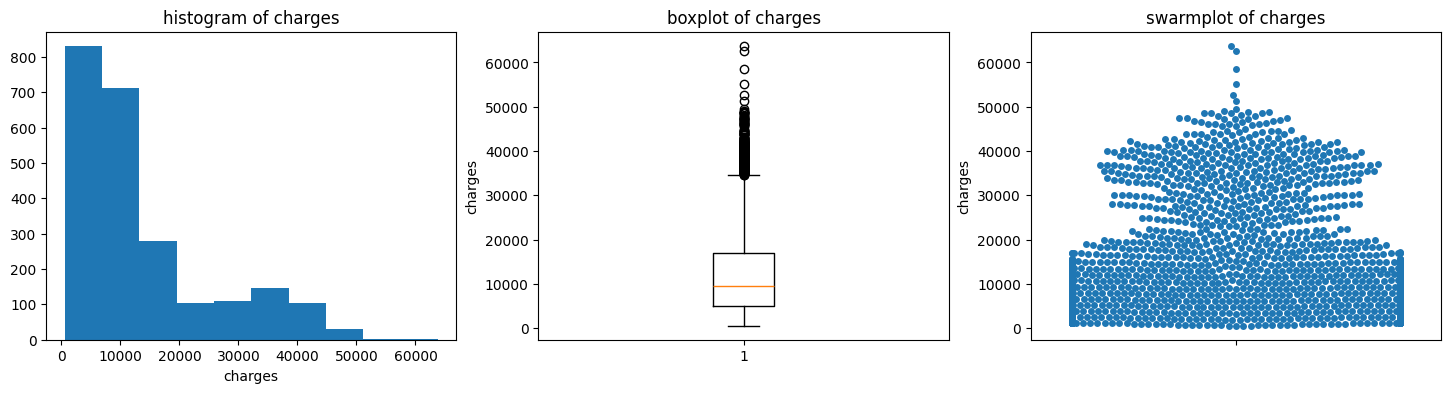

In [33]:
plt.figure(figsize = (18,4))

plt.subplot(1,3,1)
plt.hist(df['charges'])
plt.title('histogram of charges')
plt.xlabel('charges')

plt.subplot(1,3,2)
plt.boxplot(df['charges'])
plt.title('boxplot of charges')
plt.ylabel('charges')

plt.subplot(1,3,3)
sns.swarmplot(df['charges'])
plt.title('swarmplot of charges')
plt.ylabel('charges')

plt.show()

- Charges (Target) column has right skewed may because of patients have different type of illness according to that chaarges are applied.

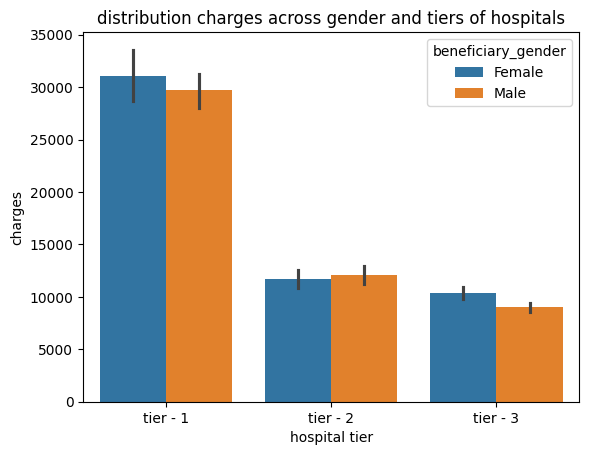

In [34]:
sns.barplot(x=df['hospital tier'], y=df['charges'], hue=df['beneficiary_gender'])
plt.title('distribution charges across gender and tiers of hospitals')
plt.show()

- In comparison to hospital tiers, hospital tier 1 charges are high it may be because a well-maintained hospital and has good doctors.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'hba1c'}>],
       [<Axes: title={'center': 'numberofmajorsurgeries'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

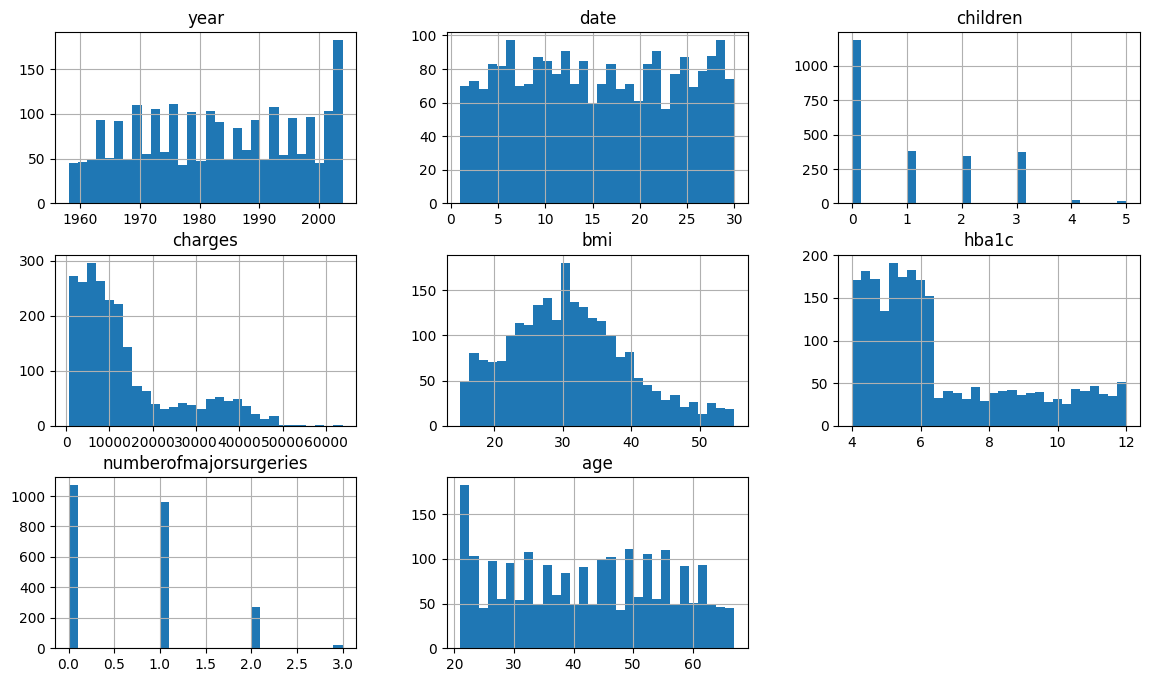

In [35]:
## Creating histogram plot

df.hist(bins = 30, figsize=(14,8))

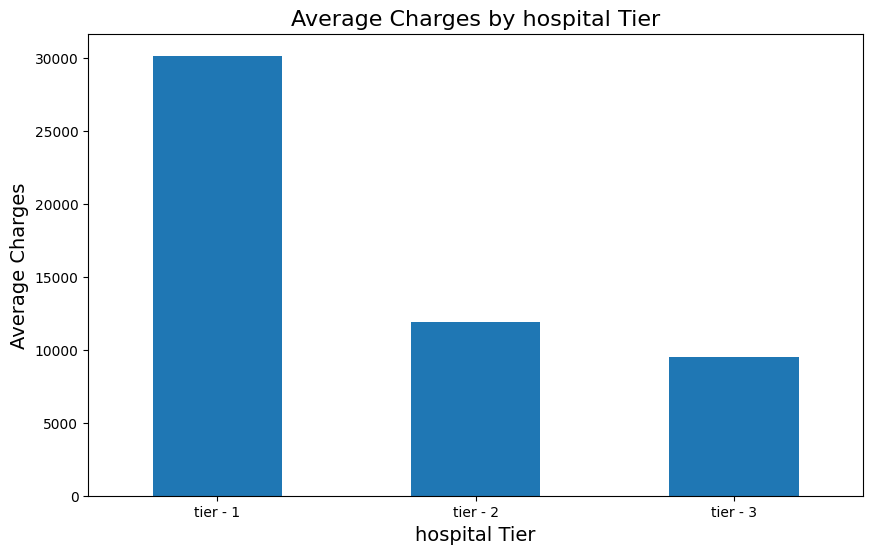

In [36]:
## Average charges against hospital

average_charges = df.groupby('hospital tier')['charges'].mean()

average_charges.plot(kind='bar', figsize=(10, 6))
plt.title('Average Charges by hospital Tier', fontsize=16)
plt.xlabel('hospital Tier', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)
plt.show()

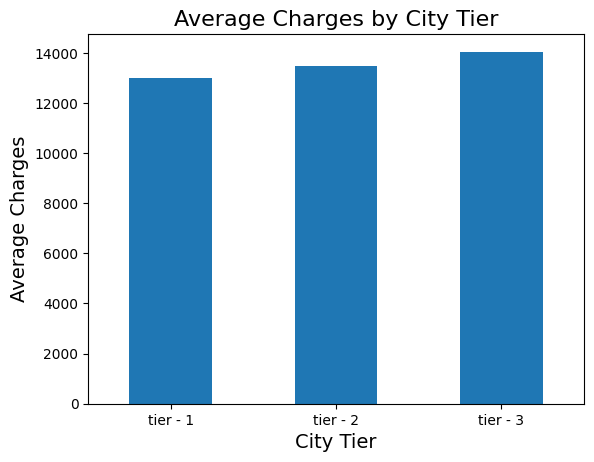

In [37]:
## Average charges against city tier

df.groupby('city tier')['charges'].mean().plot(kind = 'bar')
plt.title('Average Charges by City Tier', fontsize=16)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [38]:
## Checking for which city has which type of hospitals is there and how many

counts = df.groupby(['city tier', 'hospital tier']).size().unstack()

In [39]:
counts

hospital tier,tier - 1,tier - 2,tier - 3
city tier,,,
tier - 1,85,403,241
tier - 2,106,479,222
tier - 3,109,452,228


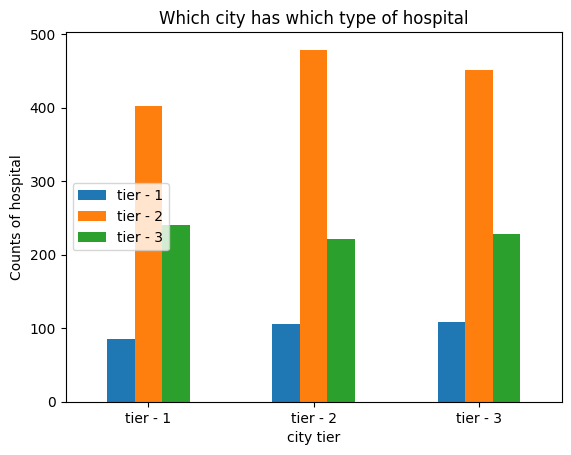

In [40]:
counts.plot(kind = 'bar')
plt.title('Which city has which type of hospital')
plt.ylabel('Counts of hospital')
plt.legend(loc = 'center left')
plt.xticks(rotation=0)
plt.show()

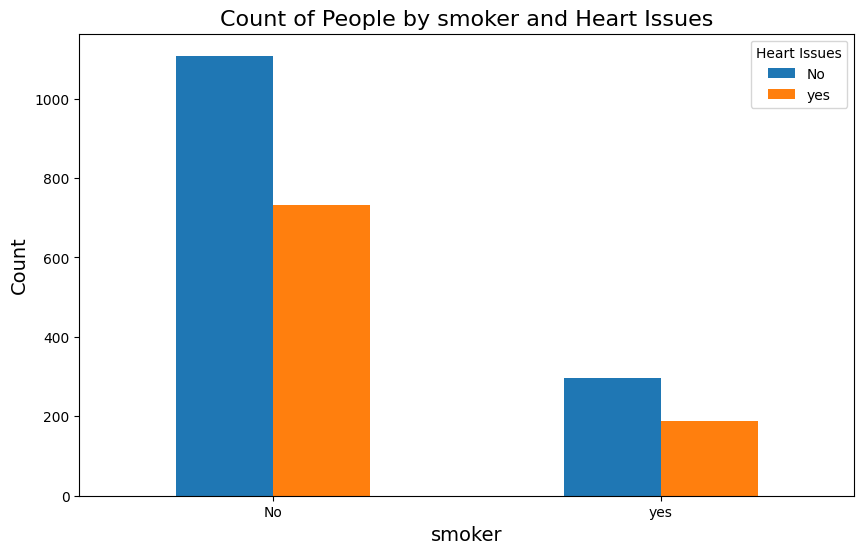

In [41]:
grouped_counts = df.groupby(['smoker', 'heart issues']).size().unstack()

# Plotting the grouped bar plot
grouped_counts.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Count of People by smoker and Heart Issues', fontsize=16)
plt.xlabel('smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Heart Issues')

plt.show()

- The maximum patient is not a smoker and does not have any heart issues.
- If the patient is smoker will see what charges they have to give compare to others.

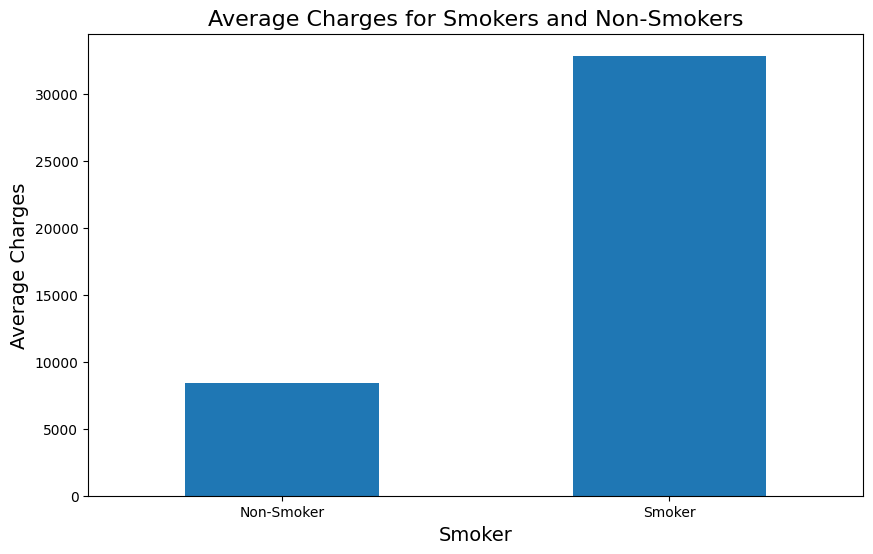

In [42]:
## Average charges of whether patient smokes or not

average_charges_smoker = df.groupby('smoker')['charges'].mean()

average_charges_smoker.plot(kind = 'bar', figsize=(10,6))
plt.title('Average Charges for Smokers and Non-Smokers', fontsize=16)
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

- Patient who smokes has to give more charges

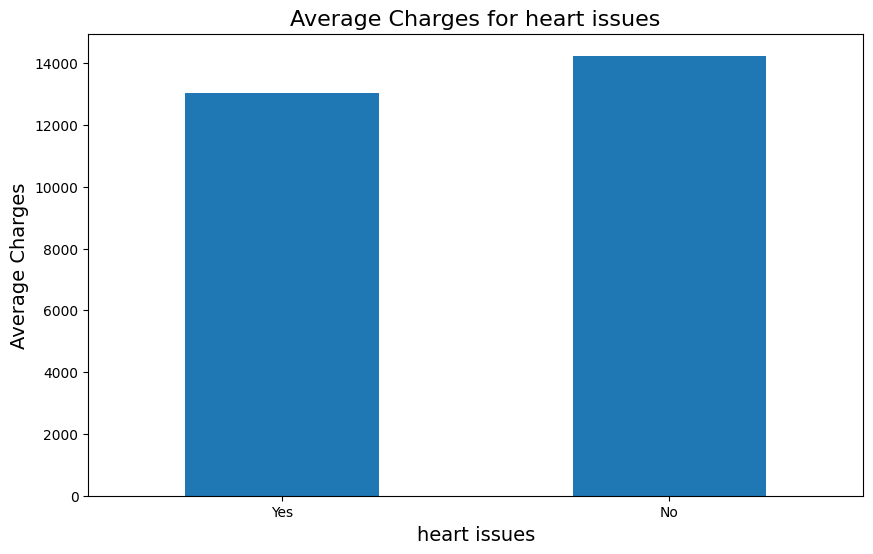

In [43]:
## Average charges of whether patient has heart issues or not

average_charges_smoker = df.groupby('heart issues')['charges'].mean()

average_charges_smoker.plot(kind = 'bar', figsize=(10,6))
plt.title('Average Charges for heart issues', fontsize=16)
plt.xlabel('heart issues', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.show()

heart issues          No         yes
smoker                              
No            8642153.67  6822363.75
yes           9690975.85  6282366.82


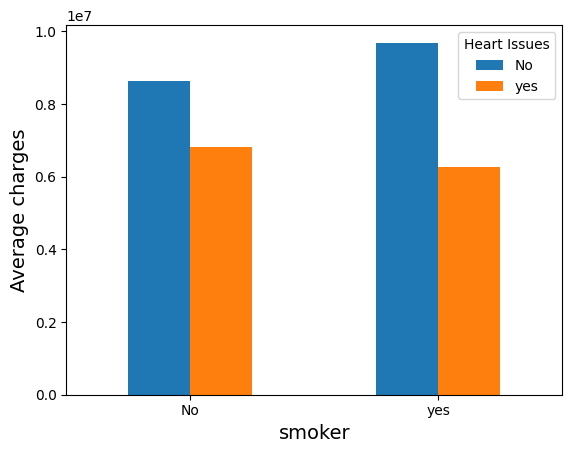

In [45]:
print(df.groupby(['smoker', 'heart issues'])['charges'].sum().unstack())
df.groupby(['smoker', 'heart issues'])['charges'].sum().unstack().plot(kind = 'bar')

# Adding labels and title
plt.title('', fontsize=16)
plt.xlabel('smoker', fontsize=14)
plt.ylabel('Average charges', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Heart Issues')

plt.show()

- Patients who smoke but do not have any heart issues their charges are high.
- A patient Who is not a smoker and has no heart issues has high charges.

## Preprocessing

#### - separting category and numerical columns for better understanding

In [46]:
category_columns = [cols for cols in df.columns if df[cols].dtype == 'object']

In [47]:
category_columns

['customer id',
 'name',
 'month',
 'hospital tier',
 'city tier',
 'state id',
 'heart issues',
 'any transplants',
 'cancer history',
 'smoker',
 'beneficiary_gender']

In [48]:
df.head(2)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,0,yes,57,Female
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.36,5.77,No,No,No,0,yes,48,Male


In [49]:
category_columns = [cols for cols in df.columns if df[cols].dtype == 'object']
category_columns

['customer id',
 'name',
 'month',
 'hospital tier',
 'city tier',
 'state id',
 'heart issues',
 'any transplants',
 'cancer history',
 'smoker',
 'beneficiary_gender']

#### Label_Encoding

In [50]:
df.head(2)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,0,yes,57,Female
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.36,5.77,No,No,No,0,yes,48,Male


In [51]:
def label_encoding(cols):
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])


for features in ['heart issues', 'any transplants', 'cancer history', 'smoker', 'beneficiary_gender', 'month', 'hospital tier', 'city tier']:
    label_encoding(features)

In [52]:
df.head(2)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,Id1,"Hawks, Ms. Kelly",1968,5,12,0,63770.43,0,2,R1013,47.41,7.47,0,0,0,0,1,57,0
1,Id2,"Lehner, Mr. Matthew D",1977,3,8,0,62592.87,1,2,R1013,30.36,5.77,0,0,0,0,1,48,1


In [53]:
df['state id'].value_counts()

state id
R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: count, dtype: int64

In [54]:
state = pd.get_dummies(df['state id'], prefix = 'state', drop_first = True, dtype = int)
df = pd.concat([df, state], axis=1)

In [55]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,state id,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender,state_R1012,state_R1013,state_R1014,state_R1015,state_R1016,state_R1017,state_R1018,state_R1019,state_R1020,state_R1021,state_R1022,state_R1023,state_R1024,state_R1025,state_R1026
0,Id1,"Hawks, Ms. Kelly",1968,5,12,0,63770.43,0,2,R1013,47.41,7.47,0,0,0,0,1,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.drop(columns = ['state_R1024','state_R1026','state_R1021','state_R1016','state_R1025','state_R1023','state_R1017','state_R1019','state_R1022','state_R1014','state_R1015','state_R1018','state_R1020'], axis = 1, inplace = True)

In [57]:
df.drop('state id', axis = 1, inplace = True)

In [58]:
df.head(1)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender,state_R1012,state_R1013
0,Id1,"Hawks, Ms. Kelly",1968,5,12,0,63770.43,0,2,47.41,7.47,0,0,0,0,1,57,0,0,1


In [59]:
df.dtypes

customer id                object
name                       object
year                        int64
month                       int64
date                        int64
children                    int64
charges                   float64
hospital tier               int64
city tier                   int64
bmi                       float64
hba1c                     float64
heart issues                int64
any transplants             int64
cancer history              int64
numberofmajorsurgeries      int64
smoker                      int64
age                         int64
beneficiary_gender          int64
state_R1012                 int64
state_R1013                 int64
dtype: object

## Machine Learning

#### Correlation Heatmap

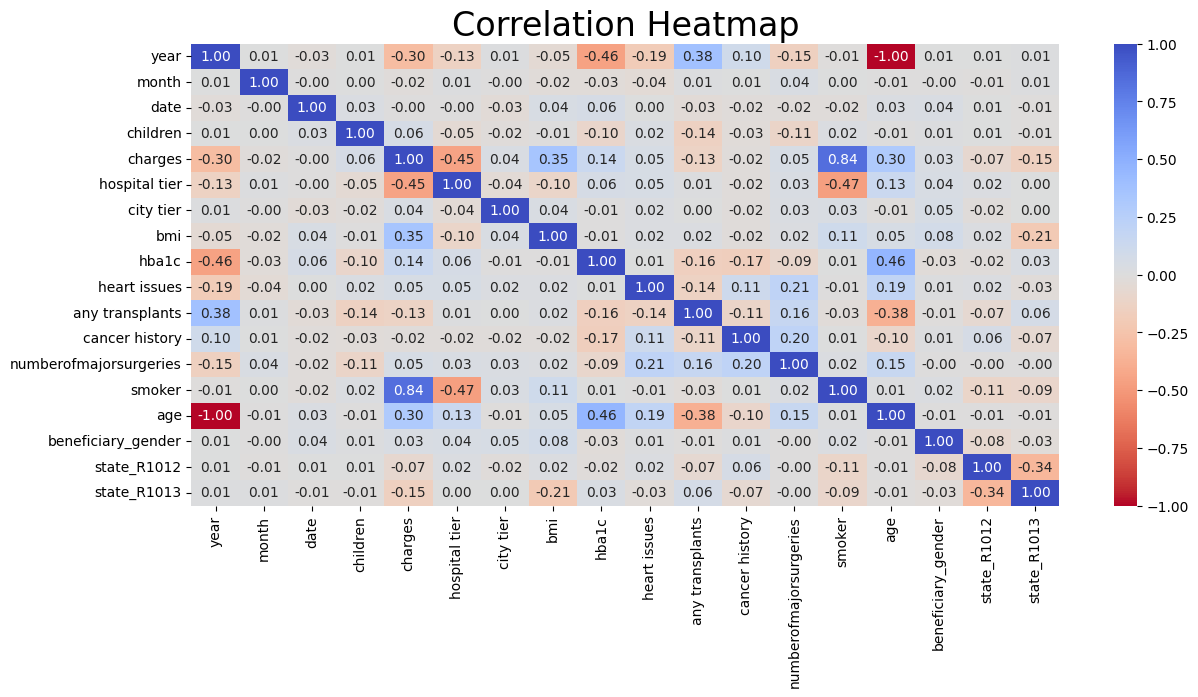

In [60]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (14,6))
sns.heatmap(corr, annot=True,cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Heatmap',fontsize=24)
plt.show()

- Correlation between Age and hba1c(Gulucode/Sugar level)
- Correlation between Age and charges
- Correlation between bmi and charges

### Splitting and Kfold

In [61]:
x = df.drop(columns = ['name', 'customer id', 'charges', 'state_R1012', 'state_R1013'], axis = 1)
y = df['charges']

In [62]:
x.head(1)

,year,month,date,children,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,1968,5,12,0,0,2,47.41,7.47,0,0,0,0,1,57,0


In [63]:
x.head(1)

,year,month,date,children,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,1968,5,12,0,0,2,47.41,7.47,0,0,0,0,1,57,0


In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

linear_reg = LinearRegression()
ridge_reg = Ridge()

linear_pipeline = Pipeline([('scaler', scaler), ('regressor', linear_reg)])
ridge_pipeline = Pipeline([('scaler', scaler), ('regressor', ridge_reg)])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linear_cv_scores = cross_val_score(linear_pipeline, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_pipeline, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')


print("Linear Regression CV Scores:")
print("Mean:", -np.mean(linear_cv_scores))
print("Standard Deviation:", np.std(linear_cv_scores))
print("\nRidge Regression CV Scores:")
print("Mean:", -np.mean(ridge_cv_scores))
print("Standard Deviation:", np.std(ridge_cv_scores))

Linear Regression CV Scores:
Mean: 20440306.06298303
Standard Deviation: 1831431.386486097

Ridge Regression CV Scores:
Mean: 20120211.522692062
Standard Deviation: 2025982.125509171


### Splitting into train and test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [66]:
linear_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('linear_regression', LinearRegression())])

In [67]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [68]:
linear_pipe_y_pred = linear_pipeline.predict(X_test)

In [69]:
r2_score = metrics.r2_score(y_test, linear_pipe_y_pred)
mse = metrics.mean_squared_error(y_test, linear_pipe_y_pred)
mae = metrics.mean_absolute_error(y_test, linear_pipe_y_pred)

print('--'*30)
print('r2_score : ', r2_score)
print('mean sqaured error : ', mse)
print('mean absolute error : ', mae)
print('--'*30)

------------------------------------------------------------
r2_score :  0.8711665023483408
mean sqaured error :  19129765.75272858
mean absolute error :  2762.4716679177195
------------------------------------------------------------


In [70]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [71]:
r_pipe_y_pred = ridge_pipeline.predict(X_test)

In [72]:
r2_score = metrics.r2_score(y_test, r_pipe_y_pred)
mse = metrics.mean_squared_error(y_test, r_pipe_y_pred)
mae = metrics.mean_absolute_error(y_test, r_pipe_y_pred)

print('--'*30)
print('r2_score : ', r2_score)
print('mean sqaured error : ', mse)
print('mean absolute error : ', mae)
print('--'*30)

------------------------------------------------------------
r2_score :  0.8711588322225308
mean sqaured error :  19130904.646826122
mean absolute error :  2763.1996396129803
------------------------------------------------------------


In [73]:
ridge_new = Ridge()

ridge_new.fit(X_train, y_train)

param_grid = {
    'alpha' : [1,2,3,4,5,6,7,8,9,10],
    'solver' : ['svd','auto', 'cholesky', 'lsqr', 'sparse_cg']
}

ridge_grid_search = GridSearchCV(estimator=ridge_new, param_grid=param_grid, cv=5,)

ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'solver': ['svd', 'auto', 'cholesky', 'lsqr',
                                    'sparse_cg']})

In [74]:
ridge_grid_search.best_params_

{'alpha': 1, 'solver': 'sparse_cg'}

In [75]:
ridge_grid_search.best_score_

np.float64(0.8540589019141958)

- Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [92]:
dt_pred = dt_reg.predict(X_test)

In [99]:
dt_mae = metrics.mean_absolute_error(y_test, dt_pred)
dt_mse = metrics.mean_squared_error(y_test, dt_pred)
dt_score = metrics.r2_score(y_test, dt_pred)
dt_rmse = metrics.root_mean_squared_error(y_test, dt_pred)

print('***'*20)
print(f'mean absolute error : {dt_mae}')
print(f'mean sqaured error : {dt_mse}')
print(f'r2_score : {dt_score}')
print(f'root mean squared error : {dt_rmse}')
print('***'*20)

************************************************************
mean absolute error : 2802.137956989247
mean sqaured error : 27907446.07123892
r2_score : 0.8120513374624082
root mean squared error : 5282.749858855605
************************************************************


- Random forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
forest_pred = forest.predict(X_test)

In [100]:
forest_mae = metrics.mean_absolute_error(y_test, forest_pred)
forest_mse = metrics.mean_squared_error(y_test, forest_pred)
forest_score = metrics.r2_score(y_test, forest_pred)
forest_rmse = metrics.root_mean_squared_error(y_test, forest_pred)

print('***'*20)
print(f'mean absolute error : {forest_mae}')
print(f'mean sqaured error : {forest_mse}')
print(f'r2_score : {forest_score}')
print(f'root mean squared error : {forest_rmse}')
print('***'*20)

************************************************************
mean absolute error : 2247.3045359139787
mean sqaured error : 13658388.06884299
r2_score : 0.9080146652113739
root mean squared error : 3695.725648481363
************************************************************


- Random forest regressor hypertuning

In [101]:
forest_tune = RandomForestRegressor()

In [125]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(start = 100, stop = 500, step = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(start = 1, stop = 25, step = 3)]

In [128]:
forest_grid = [{
    'n_estimators' : [100,110,120,130,140,150],
    'max_depth' : max_depth,
    'max_features' : ['sqrt', 'log2']
}]

print(forest_grid)

[{'n_estimators': [100, 110, 120, 130, 140, 150], 'max_depth': [1, 4, 7, 10, 13, 16, 19, 22], 'max_features': ['sqrt', 'log2']}]


In [129]:
forest_grid = GridSearchCV(forest_tune, param_grid=forest_grid, cv=5)

forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 4, 7, 10, 13, 16, 19, 22],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 110, 120, 130, 140, 150]}])

In [131]:
forest_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 4, 7, 10, 13, 16, 19, 22],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 110, 120, 130, 140, 150]}])>

In [132]:
forest_grid.best_score_

np.float64(0.8819762600687815)

In [130]:
forest_grid.best_params_

{'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 130}

In [133]:
regressor = RandomForestRegressor(max_depth=16, max_features='sqrt', n_estimators=130)

In [134]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, max_features='sqrt', n_estimators=130)

In [135]:
y_pred = regressor.predict(X_test)

In [137]:
tune_mae = metrics.mean_absolute_error(y_test, y_pred)
tune_mse = metrics.mean_squared_error(y_test, y_pred)
tune_score = metrics.r2_score(y_test, y_pred)
tune_rmse = metrics.root_mean_squared_error(y_test, y_pred)

print('***'*20)
print(f'mean absolute error : {tune_mae}')
print(f'mean sqaured error : {tune_mse}')
print(f'r2_score : {tune_score}')
print(f'root mean squared error : {tune_rmse}')
print('***'*20)

************************************************************
mean absolute error : 2748.541580168138
mean sqaured error : 16314037.05141785
r2_score : 0.8901296293263219
root mean squared error : 4039.063883057292
************************************************************


In [138]:
## Comparin both Randomforest

model = ['RandomForest', 'RandomForest_hypertune']
score = [forest_score, tune_score]

In [147]:
pd.DataFrame(data=score, index=model, columns = ['Score'])

,Score
RandomForest,0.908015
RandomForest_hypertune,0.890130


## Random Forest without Hypertuning gives best results

In [148]:
gbr = GradientBoostingRegressor()

In [149]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [150]:
feature = gbr.feature_importances_

In [151]:
feature

array([3.64377276e-02, 6.99930898e-04, 2.15413715e-03, 7.58312273e-03,
       2.15886468e-02, 5.56488474e-05, 1.19961305e-01, 5.08704887e-03,
       5.06672301e-05, 4.35401317e-04, 1.36355403e-04, 1.34353051e-04,
       7.52647893e-01, 5.19122516e-02, 1.11550997e-03])

In [152]:
important_columns = pd.DataFrame(
    data=feature,
    index=X_train.columns,
    columns=['important_features'],
    dtype=float
)

important_columns.sort_values(by = 'important_features')[::-1]

,important_features
smoker,0.752648
bmi,0.119961
age,0.051912
year,0.036438
hospital tier,0.021589
children,0.007583
hba1c,0.005087
date,0.002154
beneficiary_gender,0.001116
month,0.000700


In [153]:
X_train.head(1)

,year,month,date,children,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
1228,1970,0,12,0,2,2,34.1,9.04,1,0,0,2,0,55,1


In [82]:
y_train.head(1)

1228    9140.95
Name: charges, dtype: float64

# Task - 3

In [83]:
secnerio = pd.DataFrame([[1970, 0, 12, 0, 2, 2, 34.1, 9.04, 1, 0, 0, 2, 0, 55, 1]], columns = X_train.columns)

In [84]:
secnerio

,year,month,date,children,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender
0,1970,0,12,0,2,2,34.1,9.04,1,0,0,2,0,55,1


In [85]:
ridge_grid_search.predict(secnerio)

array([11676.54549107])

### Task 4 - Prediction System

In [86]:
import pickle

In [154]:
pickle.dump(ridge_grid_search, open('ridge_grid_search.pkl', 'wb'))
pickle.dump(forest, open('forest.pkl', 'wb'))

In [155]:
df.head(2)

,customer id,name,year,month,date,children,charges,hospital tier,city tier,bmi,hba1c,heart issues,any transplants,cancer history,numberofmajorsurgeries,smoker,age,beneficiary_gender,state_R1012,state_R1013
0,Id1,"Hawks, Ms. Kelly",1968,5,12,0,63770.43,0,2,47.41,7.47,0,0,0,0,1,57,0,0,1
1,Id2,"Lehner, Mr. Matthew D",1977,3,8,0,62592.87,1,2,30.36,5.77,0,0,0,0,1,48,1,0,1


In [156]:
## Merging csv's into one
hospital_details_df = pd.read_csv('Hospitalisation details.csv')
medical_df = pd.read_csv('Medical Examinations.csv')
Patient_names = pd.read_excel('Names.xlsx')
first_merge = pd.merge(left = hospital_details_df, right = medical_df, on = 'Customer ID')
data_new = pd.merge(left = Patient_names, right = first_merge, on = 'Customer ID')
df_new = data_new.copy()
df_new.head(2)

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.36,5.77,No,No,No,No major surgery,yes


In [158]:
df_new.sample(frac=1).head(4)

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
776,Id777,"Lee, Mrs. Karen L.",1964,Sep,24,0,13375.76,tier - 3,tier - 2,R1025,30.710,5.59,yes,No,No,1,No
1405,Id1406,"Sulkowski, Mr. Adam",1996,Sep,17,0,7623.13,tier - 2,tier - 3,R1011,41.200,4.18,yes,No,No,No major surgery,No
1031,Id1032,"Yaremczuk, Ms. Natasha",1969,Nov,10,1,10942.13,tier - 3,tier - 3,R1012,24.795,4.07,yes,No,Yes,1,No
186,Id187,"Dublin, Mr. Andrew P",1992,Oct,9,0,36572.80,tier - 1,tier - 2,R1011,53.210,4.27,No,No,No,1,yes
